In [1]:
#비지도 학습
#unsupervised transformation - 비지도 변환 
#차원축소 (dinensionality reduction) - 데이터셋을 2차원으로
#Clustering - 군집 
#데이터를 비슷한 그룹으로 묶는 것


In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

C:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


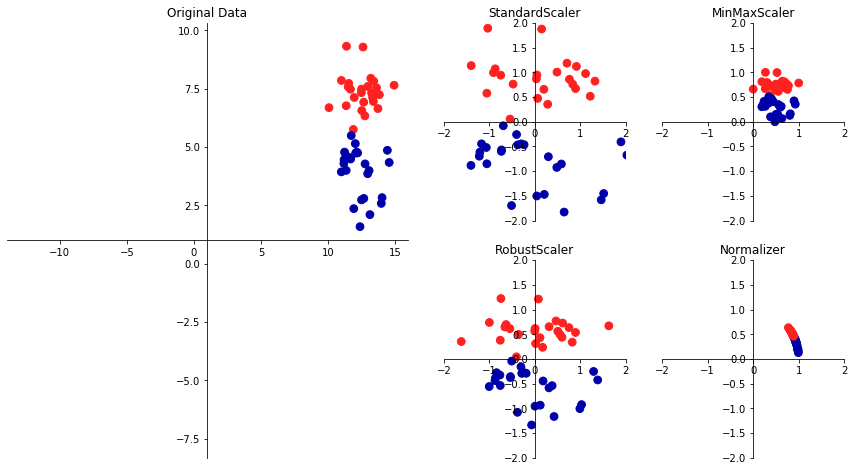

In [3]:
mglearn.plots.plot_scaling()
#StandardScaler - 평균 0 , 분산 1
#RobustScaler - 중간값, 사분위 값  이상치(outlier)에 영향을 받지 않는다
#MinMaxScaler - 모든 특성이 0 과 1사이에 위치
#Normalizer - 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트 조정 (지름이 1인 원에 투영), 
#데이터의 방향이 중요할 때 사용

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [6]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
X_train_scaled=scaler.transform(X_train)
print("변환된 후 크기:",X_train_scaled.shape)
print("스케일 조정 전 특성별 최솟값:\n",X_train.min(axis=0))
print("스케일 조정 전 특성별 최댓값:\n",X_train.max(axis=0))
print("스케일 조정 후 특성별 최솟값:\n",X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최댓값:\n",X_train_scaled.max(axis=0))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최솟값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최솟값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최댓값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
X_test_scaled=scaler.transform(X_test)
print("스케일 조정 후 특성별 최솟값:\n",X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최댓값:\n",X_test_scaled.max(axis=0))
#transform 메서드는 항상 훈련 세트의 최솟값을 빼고 훈련세트의 범위로 나눈다

스케일 조정 후 특성별 최솟값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최댓값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


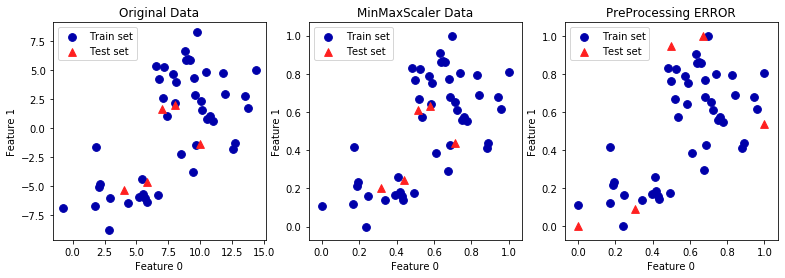

In [9]:
from sklearn.datasets import make_blobs
X,_=make_blobs(n_samples=50,random_state=4,cluster_std=2)
X_train,X_test=train_test_split(X,random_state=5,test_size=.1)

fig,axes=plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1],c=mglearn.cm2.colors[0],label="Train set",s=60)
axes[0].scatter(X_test[:,0],X_test[:,1],c=mglearn.cm2.colors[1],label="Test set",s=60,marker='^')
axes[0].legend(loc="upper left")
axes[0].set_title("Original Data")
#MINMAXSCALER
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2.colors[0],label="Train set",s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1],c=mglearn.cm2.colors[1],label="Test set",s=60,marker='^')
axes[1].legend(loc="upper left")
axes[1].set_title("MinMaxScaler Data")
#잘못된 전처리 
test_scaler=MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly=test_scaler.transform(X_test)
axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2.colors[0],label="Train set",s=60)
axes[2].scatter(X_test_scaled_badly[:,0],X_test_scaled_badly[:,1],c=mglearn.cm2.colors[1],label="Test set",s=60,marker='^')
axes[2].legend(loc="upper left")
axes[2].set_title("PreProcessing ERROR")
for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

In [10]:
# scaler=MinMaxScaler()

# scaler.fit(X_train)
# X_scaled=scaler.transform(X_train)
# =
# X_scaled=scaler.fit(X_trian).transform(X_train)
# =
# X_scaled=scaler.fit_transform(X_train)

In [11]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
svm=SVC(C=100)
svm.fit(X_train,y_train)
print("TEST SET ACCURACY:{:.2f}".format(svm.score(X_test,y_test)))

TEST SET ACCURACY:0.63


C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
scaler.fit(X_train)
X_test_scaled=scaler.transform(X_test)
svm.fit(X_train_scaled,y_train)
print("TEST SET ACCURACY:{:.2f}".format(svm.score(X_test_scaled,y_test)))



TEST SET ACCURACY:0.97


C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
scaler.fit(X_train)
X_test_scaled=scaler.transform(X_test)
svm.fit(X_train_scaled,y_train)
print("TEST SET ACCURACY:{:.2f}".format(svm.score(X_test_scaled,y_test)))


TEST SET ACCURACY:0.96


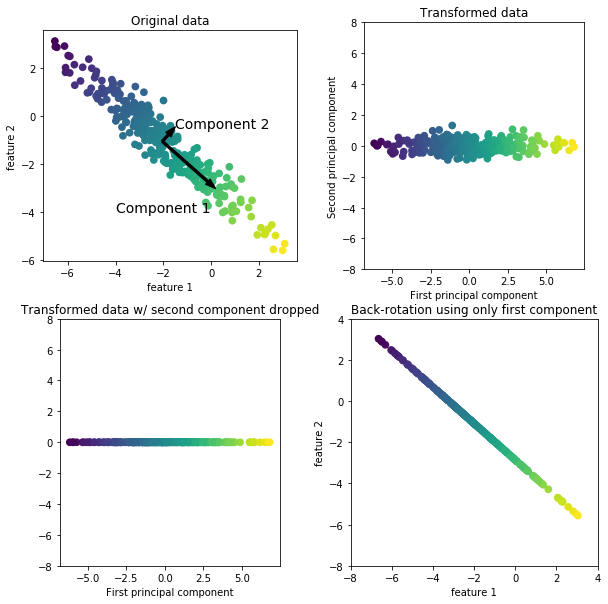

In [14]:
#Principal Component Analysis, PCA (주성분 분석)
mglearn.plots.plot_pca_illustration()
#Component 1 - 분산이 큰 특성, 많은 정보를 담고 있는 방향

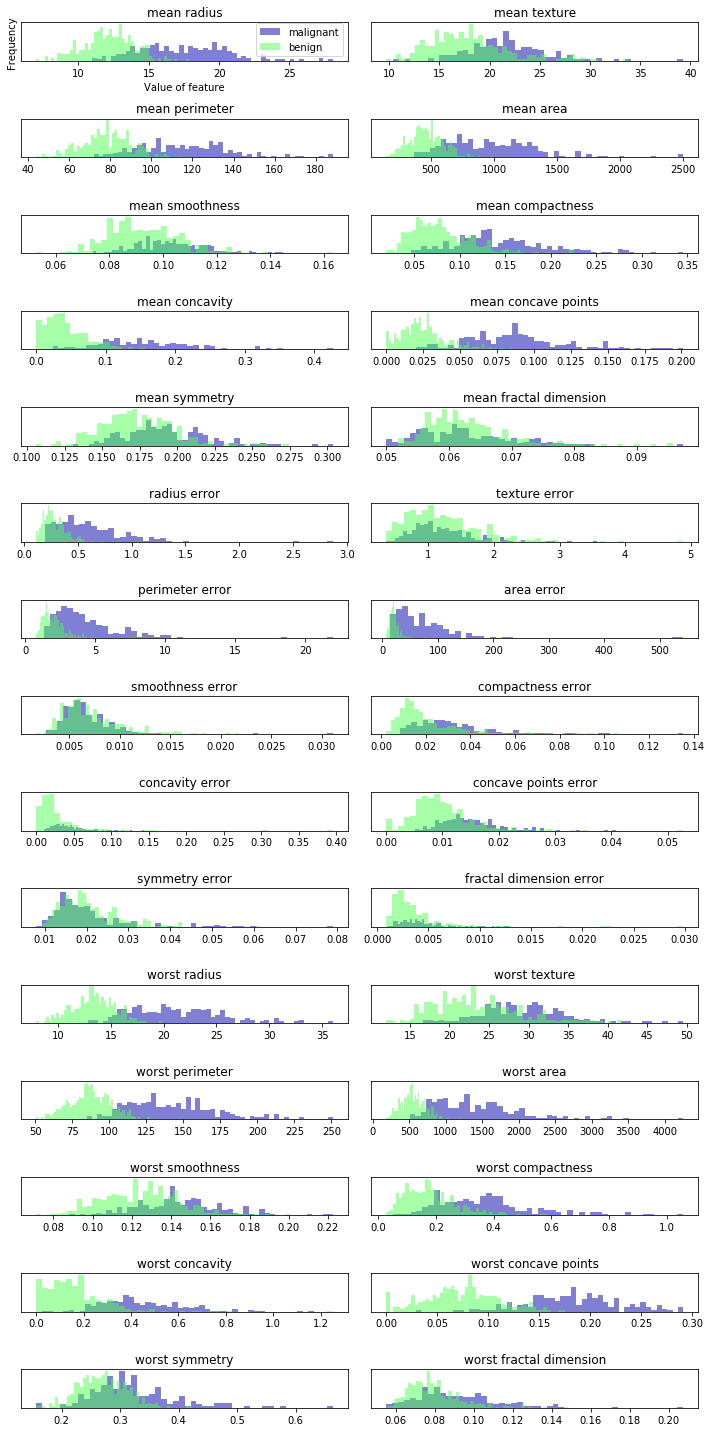

In [15]:
#고차원 데이터셋의 시각화 - 산점도 사용불가 
fig,axes= plt.subplots(15,2,figsize=(10,20))
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]
ax=axes.ravel()
for i in range(30):
#     _,bins=np.histogram(cancer.data[:,i],bins=50)
    bins=50
    ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Value of feature")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant","benign"],loc="best")
fig.tight_layout()

In [16]:
a=np.array([[1,2,3],[4,5,6],[4,5,12]])

In [17]:
a.shape

(3, 3)

In [18]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
scaler=StandardScaler()
scaler.fit(cancer.data)
X_scaled=scaler.transform(cancer.data)

In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) #데이터의 처음 두 개 주성분만 유지
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)
print("원본 데이터 형태:",(X_scaled.shape))
print("축소된 데이터 형태:",str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, 'Principal Component 2')

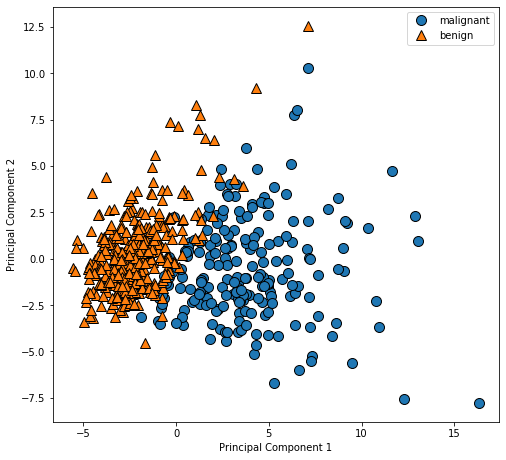

In [20]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)

plt.legend(["malignant","benign"],loc="best")
plt.gca().set_aspect("equal")  #정사각형 모양 
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

In [21]:
print("PCA 주성분 형태:",pca.components_.shape)
#주성분 2개

PCA 주성분 형태: (2, 30)


In [22]:
print("PCA  주성분 :",pca.components_)

PCA  주성분 : [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


([<matplotlib.axis.XTick at 0x13bd30aa448>,
 <a list of 30 Text xticklabel objects>)

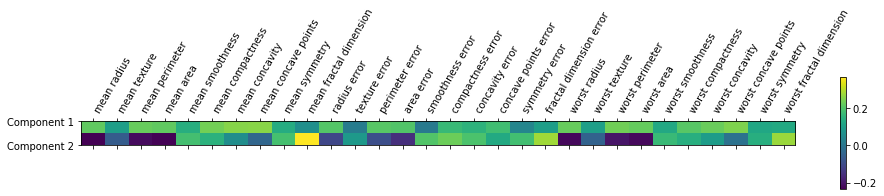

In [23]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],["Component 1","Component 2"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha='left') #ha-문자 시작위치

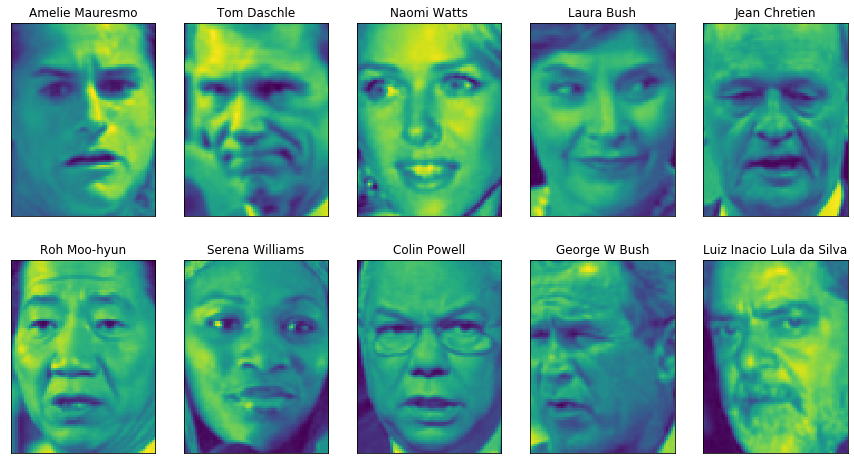

In [24]:
#고유얼굴 (Eigenface) 특성 추출
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape=people.images[0].shape
fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
# subplot_kw add_subplot()을 사용할 때 사용할 키워드 담는 dict
for target,image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [25]:
people.images.shape #2986이미지 87x65 픽셀

(2986, 87, 65)

In [26]:
len(people.target_names) #클래스 개수


61

In [27]:
counts=np.bincount(people.target)
for i,(count,name) in enumerate(zip(counts,people.target_names)):
    print("{0:25}{1:3}".format(name,count),end=" ")
    if(i+1)%3==0:
        print()

Alejandro Toledo          39 Alvaro Uribe              35 Amelie Mauresmo           21 
Andre Agassi              36 Angelina Jolie            20 Ariel Sharon              77 
Arnold Schwarzenegger     42 Atal Bihari Vajpayee      24 Bill Clinton              29 
Carlos Menem              21 Colin Powell             236 David Beckham             31 
Donald Rumsfeld          121 George Robertson          22 George W Bush            530 
Gerhard Schroeder        109 Gloria Macapagal Arroyo   44 Gray Davis                26 
Guillermo Coria           30 Hamid Karzai              22 Hans Blix                 39 
Hugo Chavez               71 Igor Ivanov               20 Jack Straw                28 
Jacques Chirac            52 Jean Chretien             55 Jennifer Aniston          21 
Jennifer Capriati         42 Jennifer Lopez            21 Jeremy Greenstock         24 
Jiang Zemin               20 John Ashcroft             53 John Negroponte           31 
Jose Maria Aznar          23 Jua

In [28]:
mask=np.zeros(people.target.shape,dtype=np.bool) #False 로 이루어진 61개의 원소를 가진 array
for target in np.unique(people.target): #np.unique(people.target)==arary([0,1, ..,60])
    mask[np.where(people.target==target)[0][:50]]=1 #사람의 이미지 50개 까지만 1값을 가진 mask
X_people=people.data[mask] # 1명당 최대 50개의 이미지가 포함된 데이터 
y_people=people.target[mask] 

#0~255 흑백 이미지 픽셀 값을 0~1로
X_people=X_people/255

In [29]:
#people.target - 각 이미지가 가리키는 사람의 이름의 인덱스
np.unique(people.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

In [30]:
np.where(people.target==10) 

(array([   7,   11,   13,   21,   54,   55,   65,  102,  107,  131,  141,
         158,  170,  185,  193,  196,  197,  202,  204,  216,  232,  235,
         242,  262,  279,  285,  290,  311,  312,  313,  314,  338,  359,
         378,  389,  390,  392,  393,  396,  406,  428,  448,  452,  480,
         519,  523,  528,  534,  535,  538,  540,  546,  551,  585,  595,
         603,  609,  611,  620,  636,  637,  640,  653,  669,  692,  725,
         745,  758,  766,  772,  784,  797,  823,  831,  832,  836,  849,
         854,  862,  887,  907,  910,  926,  949,  954,  973,  995,  996,
        1034, 1038, 1056, 1059, 1060, 1066, 1089, 1112, 1120, 1132, 1159,
        1166, 1187, 1189, 1196, 1201, 1208, 1250, 1254, 1265, 1268, 1272,
        1276, 1278, 1281, 1314, 1323, 1346, 1354, 1366, 1383, 1384, 1392,
        1397, 1401, 1402, 1415, 1427, 1453, 1474, 1506, 1510, 1518, 1525,
        1533, 1543, 1544, 1564, 1583, 1586, 1600, 1615, 1663, 1676, 1712,
        1743, 1746, 1753, 1754, 1792, 

In [31]:
people.data.shape #2986명 사람  87x65 각 픽셀의 값

(2986, 5655)

In [32]:
X_people.shape

(2026, 5655)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,stratify=y_people,random_state=0)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("1-KNN Test Set Accuracy:{:.2f}".format(knn.score(X_test,y_test)))

1-KNN Test Set Accuracy:0.24


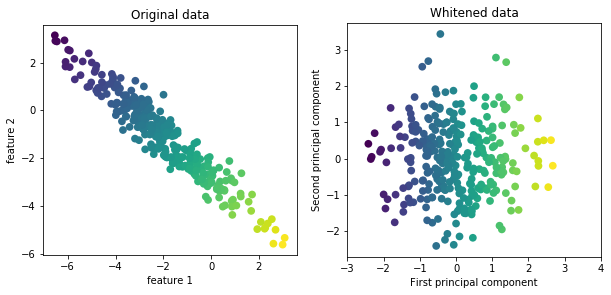

In [34]:
#PCA의 Whitening(화이트닝) 옵션 사용 주성분의 스케일이 같아지도록 조정 
#PCA변환 후 Standard Scaler 적용하는것과 같다.
mglearn.plots.plot_pca_whitening()

In [35]:
pca=PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
print("X_train_pca.shape:",X_train_pca.shape)

X_train_pca.shape: (1519, 100)


In [36]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("1-KNN Test Set Accuracy:{:.2f}".format(knn.score(X_test_pca,y_test)))

1-KNN Test Set Accuracy:0.31


In [37]:
print("pca.components_.shape",pca.components_.shape) #100개의 주성분에 5655개의 특성 영향

pca.components_.shape (100, 5655)


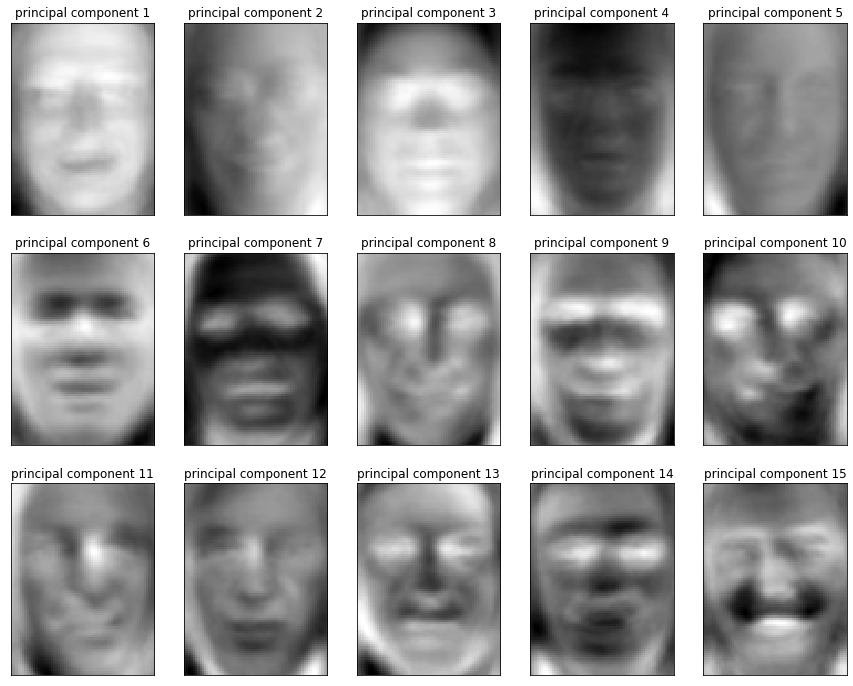

In [38]:
fig,axes=plt.subplots(3,5,figsize=(15,12),
                     subplot_kw={'xticks':(),'yticks':()})
for i,(component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='binary') #image_shape - pixel (87x65)
    ax.set_title("principal component {}".format(i+1))
    


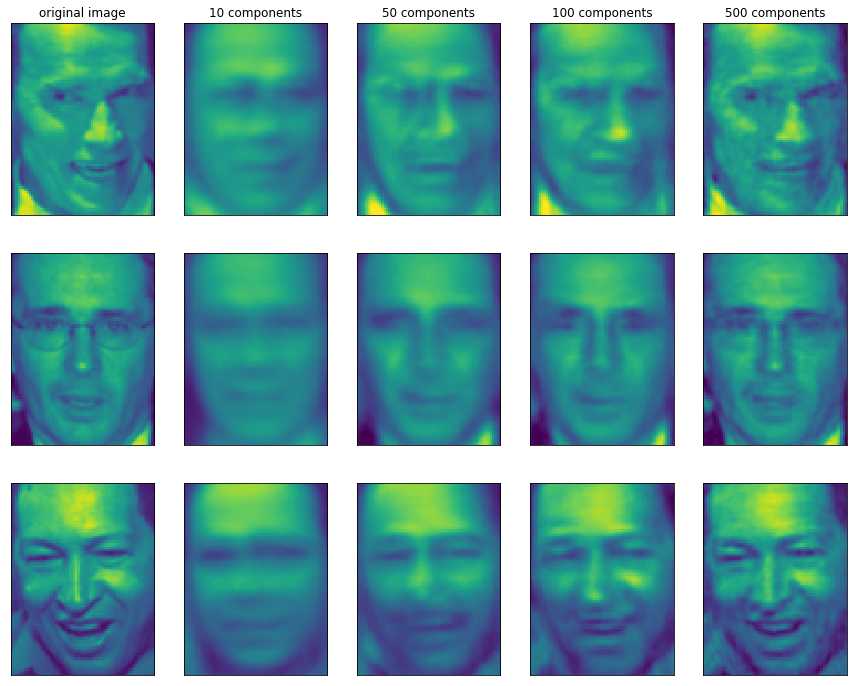

In [39]:
mglearn.plots.plot_pca_faces(X_train,X_test,image_shape)

Text(0, 0.5, 'Component 2')

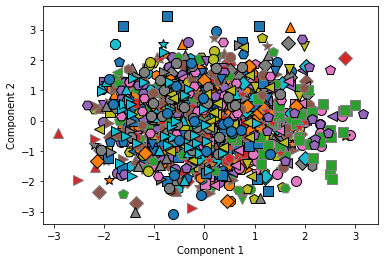

In [40]:
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1],y_train) # 주성분 1 2 
plt.xlabel("Component 1")
plt.ylabel("Component 2")

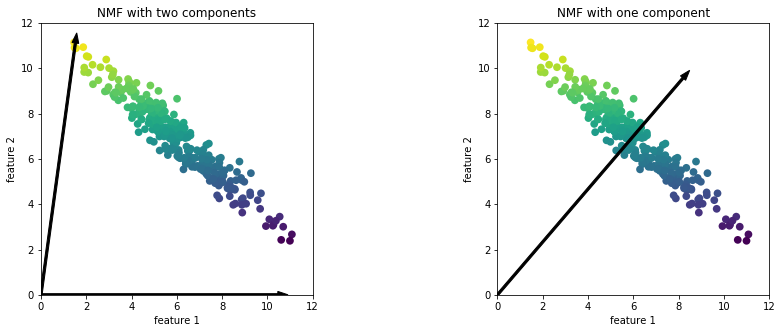

In [41]:
#Non-negative Matrix Factorizaion, NMF (비음수 행렬 분해)
#PCA에서는 데이터의 분산이 가장 큰 성분, NMF에서는 음수가 아닌 성분과 계수 값
#음수가 아닌 특성을 가진 데이터에만 적용 가능
#원점 0,0 에서 데이터로 가는 방향을 추출 
mglearn.plots.plot_nmf_illustration()

In [42]:
mglearn.plots.plot_nmf_faces(X_train,X_test,image_shape)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.265359, ..., 0.150327],
       ...,
       [0.049673, ..., 0.40915 ]], dtype=float32), 
array([[0.216993, ..., 0.177778],
       ...,
       [0.013072, ..., 0.350327]], dtype=float32))


KeyboardInterrupt: 

In [ ]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=15,random_state=0)
nmf.fit(X_train)
X_train_nmf=nmf.transform(X_train)
X_test_nmf=nmf.transform(X_test)

fig,axes=plt.subplots(3,5,figsize=(15,12),
                     subplot_kw={'xticks':(),'yticks':()})
for i,(component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("Component {}".format(i))

In [ ]:
compn=3
inds=np.argsort(X_train_nmf[:,compn])[::-1]  #np.argsort  X_train_nmf 4번째 성분으로 정렬 [::-1]= 역순
fig,axes=plt.subplots(2,5,figsize=(15,8),
                     subplot_kw={'xticks':(),'yticks':()})
for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
axes[0][0].set_title("Component 4")

compn=7
inds=np.argsort(X_train_nmf[:,compn])[::-1]  #np.argsort  X_train_nmf 4번째 성분으로 정렬 [::-1]= 역순
fig,axes=plt.subplots(2,5,figsize=(15,8),
                     subplot_kw={'xticks':(),'yticks':()})
for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
axes[0][0].set_title("Component 8")

In [ ]:
S=mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel("Time")
plt.ylabel("Signal")
# S.shape = (2000,3)

In [ ]:
A=np.random.RandomState(0).uniform(size=(100,3)) # 0~1 까지 랜덤으로 100개행 3개열 데이터
X=np.dot(S,A.T)  #100개에서만 측정
X.shape

In [ ]:
nmf=NMF(n_components=3,random_state=42)
S_=nmf.fit_transform(X)
print("복원한 신호 데이터 형태:",S_.shape)


In [ ]:
pca=PCA(n_components=3)
H=pca.fit_transform(X)

In [ ]:
models=[X,S,S_,H]
names=['Measured Signal (3)','Original Signal','Restored Signal by NMF','Restored Signal by PCA']
fig,axes=plt.subplots(4,figsize=(8,4),gridspec_kw={'hspace':.5},subplot_kw={'xticks':(),'yticks':()})
for model,name,ax in zip(models,names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')

In [ ]:
#매니폴드 학습(manifold learning )알고리즘  - 시각화 알고리즘
#t-SNE (t-Distributed Stochastic Neighbor Embedding)
#데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현 찾기
#데이터 포인트를 2차원에 무작위로 표현 후 원본 특성 공간에서 가까운 포인트는 가깝게,먼 포인트는 멀게
#이웃 데이터 포인트에 대한 정보를 보존


In [ ]:
from sklearn.datasets import load_digits
digits=load_digits()
fig,axes=plt.subplots(2,5,figsize=(10,5))
#                      subplot_kw={'xticks':(),'yticks:()'})
for ax,img in zip(axes.ravel(),digits.images):
    ax.imshow(img)

In [ ]:
pca=PCA(n_components=2)
pca.fit(digits.data)
#처음 두 개의 주성분으로 숫자 데이터를 변환합니다.
digits_pca=pca.transform(digits.data)
colors=["#476A2A","#7851B8","#12ABA3","#1535AB","#AAFFDE",
        "#AAAAFF","#000000","#353AFF","#5463AD","#FFAAA3"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,1].max())
for i in range(len(digits.data)):#1797
    plt.text(digits_pca[i,0],digits_pca[i,1],str(digits.target[i]),
            color=colors[digits.target[i]],fontdict={'weight':'bold','size':9})
plt.xlabel("Component 1")
plt.ylabel("Component 1")


In [ ]:
from sklearn.manifold import TSNE
tsne=TSNE(random_state=42) #perplextity : 크면 더 많은 이웃 포함 default 30 
#early_exaggeration 초기 과장 단계에서 원본 공간의 클러스터 들이 얼마나 멀게 2차원에 나타날지 결정
#default 4     1보다 커야하고 클수록 간격이 커진다
digits_tsne=tsne.fit_transform(digits.data)

In [ ]:
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0],digits_tsne[i,1],str(digits.target[i])
             ,color=colors[digits.target[i]],fontdict={'weight':'bold','size':9})